<a href="https://colab.research.google.com/github/TateKessler/Tate-Kessler-Github/blob/main/sqlite_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
connection = sqlite3.connect('student_grades.db')

In [2]:
print("Database created and connected!")

Database created and connected!


In [3]:
cursor = connection.cursor()

In [4]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS students (
        student_id INTEGER PRIMARY KEY AUTOINCREMENT,
        first_name TEXT NOT NULL,
        last_name TEXT NOT NULL
    )
''')

print("Students table created!")

Students table created!


In [5]:
cursor.execute('''
    CREATE TABLE IF NOT EXISTS grades (
        grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
        student_id INTEGER,
        subject TEXT NOT NULL,
        grade INTEGER NOT NULL,
        FOREIGN KEY (student_id) REFERENCES students(student_id)
    )
''')

print("Grades table created!")

Grades table created!


In [6]:
cursor.execute('''
    INSERT INTO students (first_name, last_name)
    VALUES ('Alice', 'Johnson')
''')

cursor.execute('''
    INSERT INTO students (first_name, last_name)
    VALUES ('Bob', 'Smith')
''')

cursor.execute('''
    INSERT INTO students (first_name, last_name)
    VALUES ('Carol', 'White')
''')

cursor.execute('''
    INSERT INTO students (first_name, last_name)
    VALUES ('David', 'Brown')
''')

cursor.execute('''
    INSERT INTO students (first_name, last_name)
    VALUES ('Eve', 'Davis')
''')

# Commit the transaction to the database
connection.commit()

print("Sample data inserted into students table!")

Sample data inserted into students table!


In [9]:
cursor.execute('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (1, 'Math', 95)
''')

cursor.execute('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (1, 'English', 88)
''')

cursor.execute('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (1, 'History', 90)
''')


cursor.execute('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (2, 'Math', 82)
''')

cursor.execute('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (2, 'English', 76)
''')

cursor.execute('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (2, 'History', 85)
''')


cursor.execute('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (3, 'Math', 91)
''')

cursor.execute('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (3, 'English', 87)
''')

cursor.execute('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (3, 'History', 92)
''')


cursor.execute('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (4, 'Math', 78)
''')

cursor.execute('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (4, 'English', 84)
''')

cursor.execute('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (4, 'History', 80)
''')


cursor.execute('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (5, 'Math', 89)
''')

cursor.execute('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (5, 'English', 91)
''')

cursor.execute('''
    INSERT INTO grades (student_id, subject, grade)
    VALUES (5, 'History', 86)
''')

connection.commit()

print("Grades inserted successfully!")

Grades inserted successfully!


In [12]:
cursor.execute('''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    INNER JOIN grades ON students.student_id = grades.student_id
''')

results = cursor.fetchall()

for row in results:
    print(row)


('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 91)
('Carol', 'White', 'English', 87)
('Carol', 'White', 'History', 92)
('David', 'Brown', 'Math', 78)
('David', 'Brown', 'English', 84)
('David', 'Brown', 'History', 80)
('Eve', 'Davis', 'Math', 89)
('Eve', 'Davis', 'English', 91)
('Eve', 'Davis', 'History', 86)
('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 91)
('Carol', 'White', 'English', 87)
('Carol', 'White', 'History', 92)
('David', 'Brown', 'Math', 78)
('David', 'Brown', 'English', 84)
('David', 'Brown', 'History', 80)
('Eve', 'Davis', 'Math', 89)
('Eve', 'Davis', 'English', 91)
('Eve', 'Davis', 'History', 86)


In [13]:
cursor.execute('''
    SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
    FROM students
    INNER JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
''')

results = cursor.fetchall()

for row in results:
    print(row)

('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 90.0)
('David', 'Brown', 80.66666666666667)
('Eve', 'Davis', 88.66666666666667)


In [14]:
cursor.execute('''
    SELECT students.first_name, students.last_name, AVG(grades.grade) AS average_grade
    FROM students
    INNER JOIN grades ON students.student_id = grades.student_id
    GROUP BY students.student_id
    ORDER BY average_grade DESC
    LIMIT 1;
''')


result = cursor.fetchone()

if result:
    print(f"Student: {result[0]} {result[1]}, Highest Average Grade: {result[2]}")

Student: Alice Johnson, Highest Average Grade: 91.0


In [15]:
cursor.execute('''
    SELECT AVG(grade) AS average_math_grade
    FROM grades
    WHERE subject = 'Math';
''')

result = cursor.fetchone()

if result:
    print(f"Average Math Grade: {result[0]}")

Average Math Grade: 87.0


In [16]:
cursor.execute('''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    INNER JOIN grades ON students.student_id = grades.student_id
    WHERE grades.grade > 90;
''')

results = cursor.fetchall()

for row in results:
    print(f"Student: {row[0]} {row[1]}, Subject: {row[2]}, Grade: {row[3]}")

Student: Alice Johnson, Subject: Math, Grade: 95
Student: Carol White, Subject: Math, Grade: 91
Student: Carol White, Subject: History, Grade: 92
Student: Eve Davis, Subject: English, Grade: 91
Student: Alice Johnson, Subject: Math, Grade: 95
Student: Carol White, Subject: Math, Grade: 91
Student: Carol White, Subject: History, Grade: 92
Student: Eve Davis, Subject: English, Grade: 91


In [17]:
import pandas as pd

students_df = pd.read_sql_query('SELECT * FROM students', connection)

In [18]:
grades_df = pd.read_sql_query('SELECT * FROM grades', connection)

In [19]:
import pandas as pd


query = '''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    INNER JOIN grades ON students.student_id = grades.student_id;
'''

combined_df = pd.read_sql_query(query, connection)

print(combined_df)

   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3         Bob     Smith     Math     82
4         Bob     Smith  English     76
5         Bob     Smith  History     85
6       Carol     White     Math     91
7       Carol     White  English     87
8       Carol     White  History     92
9       David     Brown     Math     78
10      David     Brown  English     84
11      David     Brown  History     80
12        Eve     Davis     Math     89
13        Eve     Davis  English     91
14        Eve     Davis  History     86
15      Alice   Johnson     Math     95
16      Alice   Johnson  English     88
17      Alice   Johnson  History     90
18        Bob     Smith     Math     82
19        Bob     Smith  English     76
20        Bob     Smith  History     85
21      Carol     White     Math     91
22      Carol     White  English     87
23      Carol     White  History     92


In [20]:
query = '''
    SELECT students.first_name, students.last_name, grades.subject, grades.grade
    FROM students
    INNER JOIN grades ON students.student_id = grades.student_id;
'''

combined_df = pd.read_sql_query(query, connection)

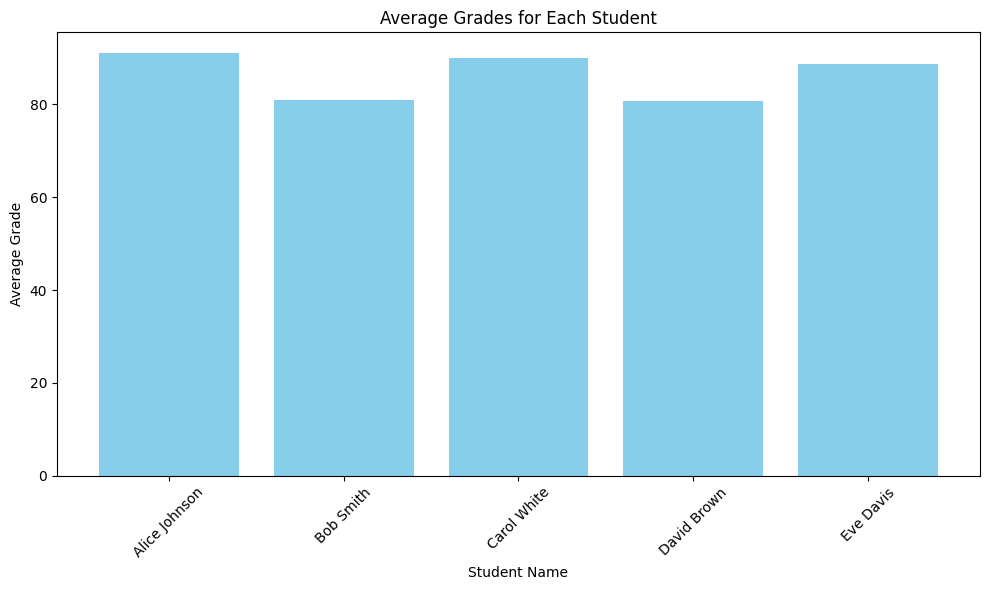

In [22]:
import matplotlib.pyplot as plt

avg_grades_df = combined_df.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()


avg_grades_df['student_name'] = avg_grades_df['first_name'] + ' ' + avg_grades_df['last_name']

plt.figure(figsize=(10, 6))
plt.bar(avg_grades_df['student_name'], avg_grades_df['grade'], color='skyblue')
plt.xlabel('Student Name')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


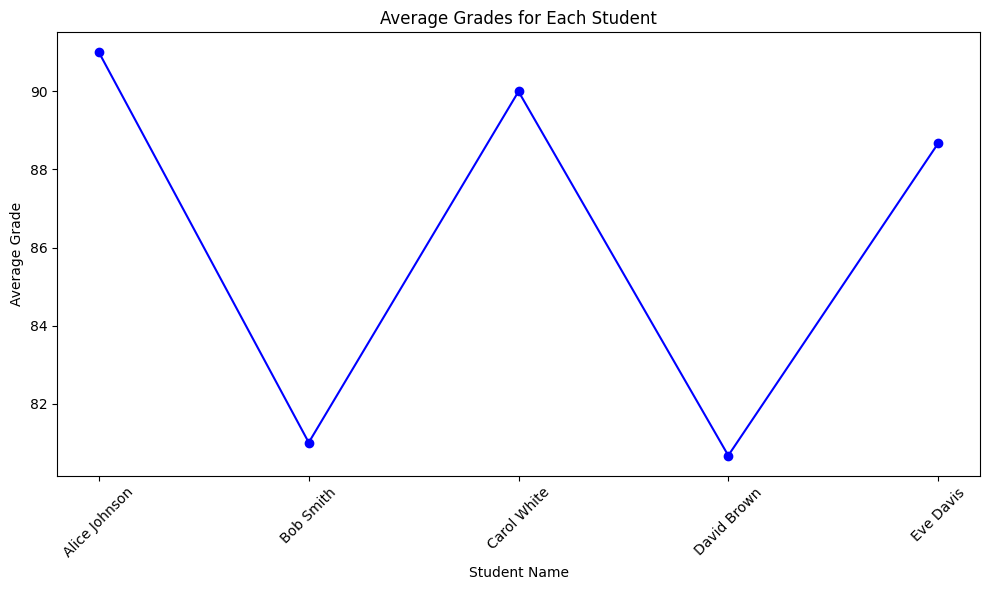

In [23]:

avg_grades_df = combined_df.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()

avg_grades_df['student_name'] = avg_grades_df['first_name'] + ' ' + avg_grades_df['last_name']

plt.figure(figsize=(10, 6))
plt.plot(avg_grades_df['student_name'], avg_grades_df['grade'], marker='o', linestyle='-', color='blue')
plt.xlabel('Student Name')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

connection.close()


EXTRA CREDIT

In [25]:
top_students_df = combined_df.loc[combined_df.groupby('subject')['grade'].idxmax()]

print(top_students_df)

   first_name last_name  subject  grade
13        Eve     Davis  English     91
8       Carol     White  History     92
0       Alice   Johnson     Math     95


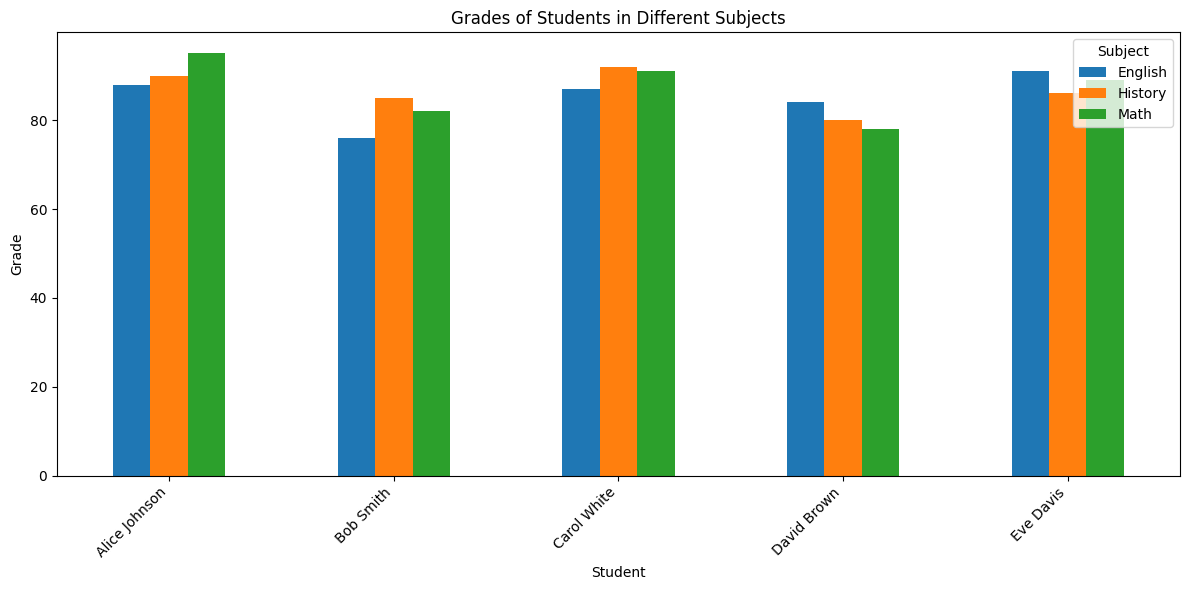

In [29]:
import matplotlib.pyplot as plt
import pandas as pd


combined_df['student_name'] = combined_df['first_name'] + ' ' + combined_df['last_name']

combined_df['grade'] = pd.to_numeric(combined_df['grade'], errors='coerce')


grouped_df = combined_df.groupby(['student_name', 'subject'])['grade'].mean().reset_index()

pivot_df = grouped_df.pivot(index='student_name', columns='subject', values='grade')

pivot_df.plot(kind='bar', figsize=(12, 6))

plt.xlabel('Student')
plt.ylabel('Grade')
plt.title('Grades of Students in Different Subjects')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Subject')

plt.tight_layout()
plt.show()